***Shark Attack dataset analysis***

**Intro:**<br />
We have been provided with a dataset which contains data on thousands of shark attacks. This data includes dates, location,resulting injuries and gender of victims amongst many other categories. Our job as Data Analysts (upcoming data analysts) is to clean this data set using our newly learn skills and use this cleaned up data to draw a hypothesis of our choice.

**Hypothesis:**<br />
We need a hypothesis or theory to prove or contradict with our observations. In todays case the hypothesis which we will prove is: 
"Despite the change in perception of sharks and shark attacks after the release of the movie "JAWS" by Steven Spielberg the actual mortality of these attacks did not increase."

**Cleaning the dataset:**<br />
As previously mentioned, the provided dataset was rather unpleasant to work with, therefore a lot of data cleaning had to take place (all of the changes made to the dataset can be found on the file data_cleaning.ipynb). Here is a brief description of the procedures taken:
1: After having imported the initial dataset and understanding the information it provided us with we first renamed the columns using a regex as they didnt follow a common sytactical pattern, so we changed this.<br />
2: Next we deleted the columns which we thought wouldnt be useful for our hypothesis as these gave us information which was redundant or provided in other columns already.<br />
3: After this we deleted the reduntant rows of our dataset which were created when importing it.<br />
4: Next up we repeated step 2 to narrow down te amount of colums to work with.<br />
5: Once step 4 was completed we identified the columns whose data needed fixing.<br />
6: Finally once all this was done we exported our modified dataset as a new csv file to work with in our analysis.


In [28]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
#Import dataset
df = pd.read_csv('shark_dom_noche.csv')
df.describe()

,Year,Age
count,6300.000000,3369.000000
mean,1927.272381,27.368359
std,281.116308,13.907779
min,0.000000,1.000000
25%,1942.000000,17.000000
50%,1977.000000,24.000000
75%,2005.000000,35.000000
max,2018.000000,87.000000


In [30]:
#Inspect data
df.head(5)

,Year,Type,Country,Area,Activity,Sex,Fatal,Age
0,2018.0,Boating,USA,California,Paddling,F,N,57.0
1,2018.0,Unprovoked,USA,Georgia,Standing,F,N,11.0
2,2018.0,NaN,USA,Hawaii,Surfing,M,N,48.0
3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,M,N,NaN
4,2018.0,Provoked,MEXICO,Colima,Free diving,M,N,NaN


**Plot some data**

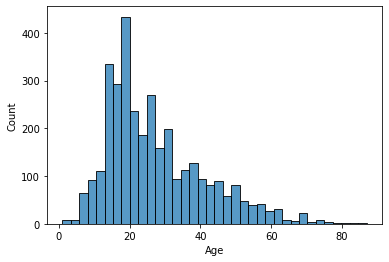

In [31]:
#Distribution of age of victims of all shark attacks
sns.histplot(x = df.Age)

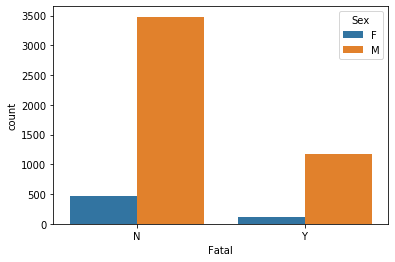

In [32]:
#Distribution of gender of victims and wether the attacks were fatal
sns.countplot(x = df.Fatal, hue = df.Sex)

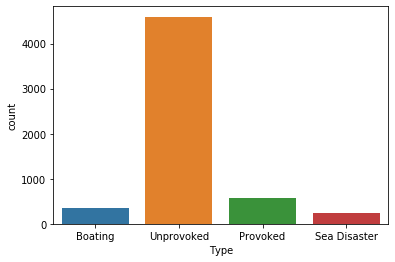

In [34]:
#Plot of type of attacks
#plt.figure(figsize=(20,10))
sns.countplot(x = df.Type)

In [41]:
#Lets find the count of values for fatal and non fatal attacks
num_of_attacks = len(df[(df['Fatal'] == "N") | (df['Fatal'] == "Y")])
fatal_attacks = len(df[(df['Fatal'] == "Y")])
non_fatal_attacks = len(df[(df['Fatal'] == "N")])

5690
5690 1389 4301


In [47]:
#Number of attacks before 1975 whech are recorded as fatal or none fatal :
attacks_pre = len(df[((df['Year'] < 1975) & (df['Year'] > 0)) & ((df['Fatal'] == "N") | (df['Fatal'] == "Y"))]) #>0 as these are documented without a year
#Number of attacks after 1975:
attacks_post = len(df[((df['Year'] >= 1975)) & ((df['Fatal'] == "N") | (df['Fatal'] == "Y"))])

2967 2599


In [61]:
#Number of fatal attacks in each interval:
fatal_pre = len(df[(df['Year'] < 1975) & (df['Year'] > 0) & (df['Fatal'] == "Y")]) #>0 as these are documented without a year
non_fatal_pre = len(df[(df['Year'] < 1975) & (df['Year'] > 0) & (df['Fatal'] == "N")]) #>0 as these are documented without a year
print(fatal_pre, non_fatal_pre)
fatal_post = len(df[(df['Year'] >= 1975) & (df['Fatal'] == "Y")]) #>0 as these are documented without a year
non_fatal_post = len(df[(df['Year'] >= 1975)& (df['Fatal'] == "N")]) #>0 as these are documented without a year
print(fatal_post, non_fatal_post)


988 1611
341 2626


In [62]:
#Lets calculate percentages:
pct_fatal_pre = fatal_pre/attacks_pre * 100
pct_fatal_post = fatal_post/attacks_post * 100

print(pct_fatal_pre, pct_fatal_post)


61.32836747361887 11.49309066397034


**Lets add some MORE graphs to help our hypothesis:**

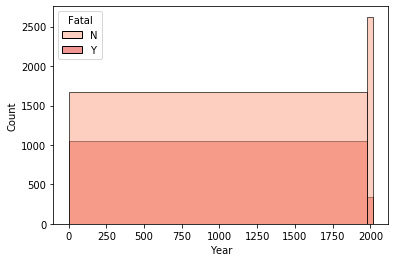

In [71]:
a = [0,1975,2018]
sns.histplot(x = df.Year, hue = df.Fatal, bins = a, palette= "Reds")

***Conclusion***


Although the movie Jaws painted sharks as lethal dangerous predators and worsened their perception, as we can see by our data the percentage of lethal shark attacks before and after this movie was released is much lower. Meaning that once again that we had our image of sharks influenced by a movie rather than the data which proves that sharks are less dangerous with time and that the hate which the species received after the release of the movie were injustified.